In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Model + Encoder
model = joblib.load("../saved_models/xgb_disease_model.pkl")
le = joblib.load("../saved_models/label_encoder.pkl")

In [3]:
# Loading Testing Dataset
test_data = pd.read_csv("../Data/Testing.csv")

In [4]:
X_test = test_data.drop("prognosis", axis=1)
y_test = test_data["prognosis"]


In [5]:
y_test_encoded = le.transform(y_test)

In [6]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))

Test Accuracy: 0.9761904761904762


In [7]:
y_pred_labels = le.inverse_transform(y_pred)

In [8]:
# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))


Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
  

In [9]:
class_names = le.classes_ 

In [10]:
models = {
    "XGBoost": "../saved_models/xgb_disease_model.pkl",
    "LightGBM": "../saved_models/lgb_disease_model.pkl",
    "CatBoost": "../saved_models/cat_disease_model.pkl"
}


===== XGBoost =====
Accuracy: 0.9761904761904762
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common

/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

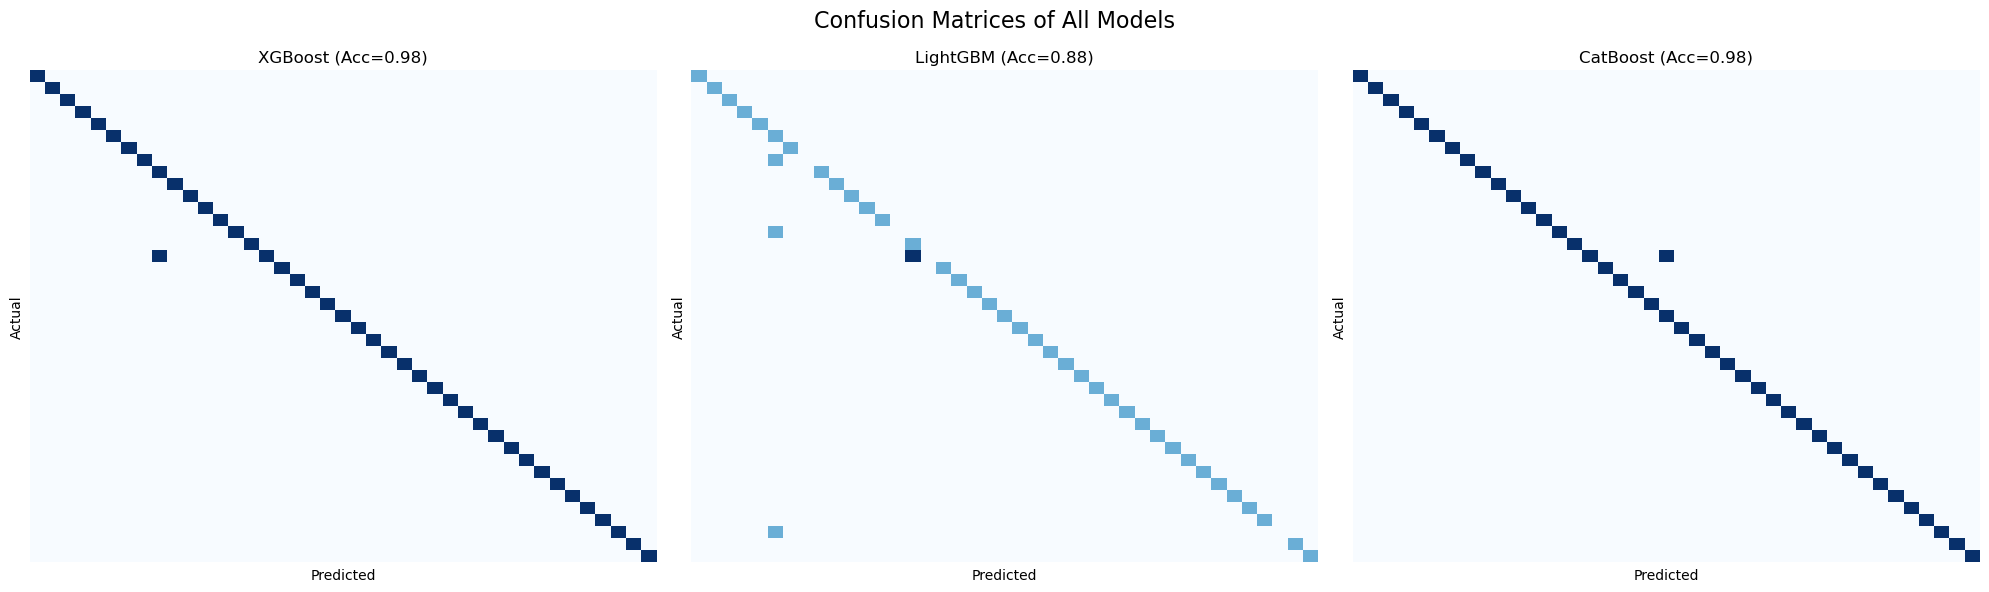

In [11]:
results = {}
# 3. Evaluate + Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 3 confusion matrices side by side

for ax, (name, path) in zip(axes, models.items()):
    model = joblib.load(path)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = acc
    
    y_pred_labels = le.inverse_transform(y_pred)
    
    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred_labels))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred, labels=range(len(class_names)))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", ax=ax,
                xticklabels=False, yticklabels=False, cbar=False)
    ax.set_title(f"{name} (Acc={acc:.2f})", fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion Matrices of All Models", fontsize=16)
plt.tight_layout()
plt.show()

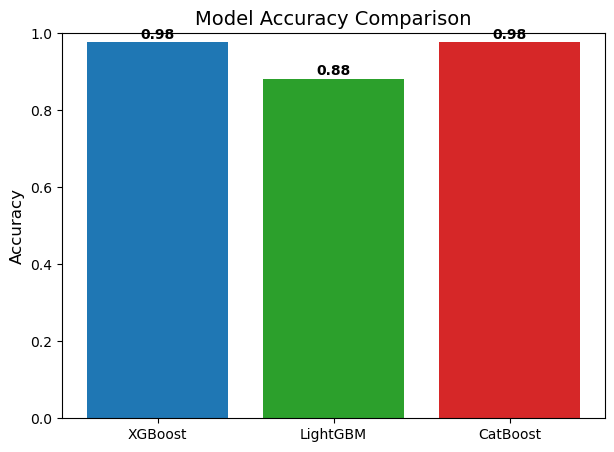

In [12]:
# 4. Accuracy Comparison Bar Chart
# =============================
plt.figure(figsize=(7,5))
plt.bar(results.keys(), results.values(), color=["#1f77b4", "#2ca02c", "#d62728"])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)

for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center", fontsize=10, fontweight="bold")

plt.show()